In [1]:
from data_loader import SFTDataset
from matplotlib import pyplot as plt
from pathlib import Path
from transformers import AutoTokenizer
from torch.utils.data import DataLoader

In [2]:
tokenizer = AutoTokenizer.from_pretrained("../mini_tokenizer")
sft_data_path = "../data/sft_data/parquet/packed_sft_data.parquet"

dataset = SFTDataset(
    file_path=sft_data_path,
    max_seq_len=512
)

Loading data from parquet file: ../data/sft_data/parquet/packed_sft_data.parquet
Detected packed parquet file (with packing)


Loading packed parquet: 100%|██████████| 15918/15918 [00:06<00:00, 2650.44it/s]

-------------- sft dataset info --------------
file path   : ../data/sft_data/parquet/packed_sft_data.parquet
file size   : 23.22 MB
packing     : True
num samples : 15918
pad ratio   : 0.18%
----------------------------------------------


In [11]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
for batch in dataloader:
    data = batch
    break

In [12]:
print(f"input_ids shape: {data["input_ids"].shape}")
print(f"labels shape: {data["labels"].shape}")
print(f"position_ids shape: {data["position_ids"].shape}")
print(f"attention_mask shape: {data["attention_mask"].shape}")

input_ids shape: torch.Size([2, 512])
labels shape: torch.Size([2, 512])
position_ids shape: torch.Size([2, 512])
attention_mask shape: torch.Size([2, 1, 512, 512])


In [13]:
id = 1
print("decoded input_ids:\n-----------------\n", tokenizer.decode(data["input_ids"][id].tolist()))

decoded input_ids:
-----------------
 <|im_start|>user
写一篇关于环保的文章。<|im_end|>
<|im_start|>assistant
好的，我将写一篇与环保相关的主题的文章。环保问题是我们面临的重要问题之一，如何保护我们的环境是一个世界性的议题，我们每个人都需要为此尽一份力。文章已经写完了，它具体讨论了如何从个人、企业和政府层面解决环保问题。希望您能喜欢这篇文章。<|im_end|>
<|im_start|>user
请为我提取这篇文章中的关键信息。<|im_end|>
<|im_start|>assistant
好的，这篇文章的关键信息是如下：环保是一个全球性的议题，我们每个人都应该为此做出贡献；我们可以通过各种方式保护环境，从个人、企业和政府层面上进行努力，这需要大家共同参与和支持。<|im_end|>
<|im_start|>user
创建一个长度为10，元素为1到1000之间的随机整数列表。\n
<|im_end|>
<|im_start|>assistant
以下是Python代码实现:

```python
import random

# 生成一个长度为10的随机整数列表
random_ints = [random.randint(1, 1000) for i in range(10)]
print(random_ints)
``` 

输出示例:

```
[649, 301, 664, 515, 910, 398, 766, 19, 149, 401]
```<|im_end|>
<|im_start|>user
写一篇介绍机器人足球的文章。<|im_end|>
<|im_start|>assistant
好的，我将为您撰写一篇介绍机器人足球的文章。机器人足球是一项新兴的运动，起源于20世纪90年代。它是一种机器人和足球相结合的比赛，通过人工智能和机器人技术相结合来实现。机器人足球比赛包含多个机器人和一个足球，每个机器人都有自己的传感器和控制系统，可以准确感知周围的环境。这个运动在全球范围内受到越来越多的关注，吸引了许多技术人员和爱好者的加入。<|im_end|>
<|im_start|>user
提取文章中机器人足球的历史信息。<|im_end|>
<|im_start|>assis

input_ids:
-----------------
 [32000, 616, 356, 199, 1620, 19833, 1646, 4660, 18996, 286, 32001, 199, 32000, 2570, 16415, 199, 2057, 270, 537, 639, 1620, 19833, 398, 4660, 3454, 3687, 18996, 286, 4660, 694, 9336, 2635, 1597, 694, 2121, 270, 1614, 1187, 4134, 947, 2413, 1129, 1370, 9282, 270, 860, 11785, 10242, 5368, 1776, 12773, 431, 286, 3311, 1545, 1620, 844, 361, 270, 914, 1556, 17654, 1614, 564, 1581, 282, 8005, 993, 3012, 1284, 4660, 694, 286, 3790, 4196, 368, 9934, 31449, 286, 32001, 199, 32000, 616, 356, 199, 1422, 322, 537, 5809, 31449, 965, 1615, 795, 286, 32001, 199, 32000, 2570, 16415, 199, 2057, 270, 31449, 3691, 795, 298, 3882, 849, 4660, 2413, 1494, 1370, 9282, 270, 860, 11785, 20996, 5368, 4536, 3058, 941, 860, 4530, 1697, 1068, 27156, 270, 564, 1581, 282, 8005, 993, 15158, 680, 2792, 270, 27626, 4988, 21746, 12110, 286, 32001, 199, 32000, 616, 356, 199, 23509, 7471, 322, 1091, 270, 3814, 322, 17, 482, 6679, 1853, 5140, 17576, 12716, 286, 60, 78, 199, 32001, 199, 32000, 

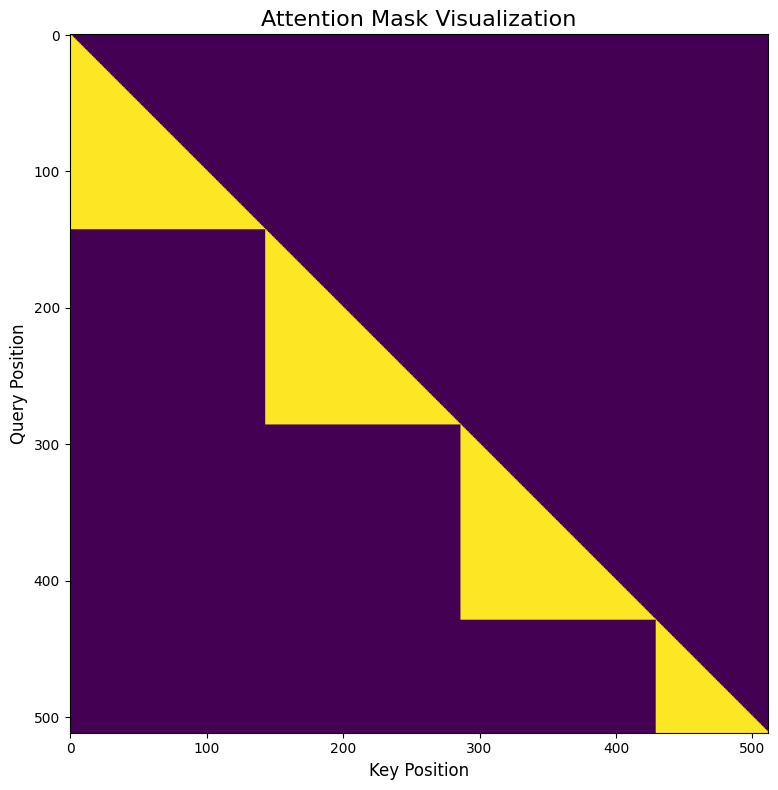

In [14]:
print(f"input_ids:\n-----------------\n", data["input_ids"][id].tolist())
print("labels:\n-----------------\n", data["labels"][id].tolist())
print("position_ids:\n-----------------\n", data["position_ids"][id].tolist())

plt.figure(figsize=(10, 8))
mask_data = data["attention_mask"][id][0].numpy()
im = plt.imshow(mask_data, cmap='viridis')
plt.title("Attention Mask Visualization", fontsize=16)
plt.xlabel('Key Position', fontsize=12)
plt.ylabel('Query Position', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()